greeks for greeks sklearn linear regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/bottle.csv')
df_binary = df[['Salnty', 'T_degC']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
#display the first 5 rows
df_binary.head()


Sal   Temp
0  33.440  10.50
1  33.440  10.46
2  33.437  10.46
3  33.420  10.45
4  33.421  10.45

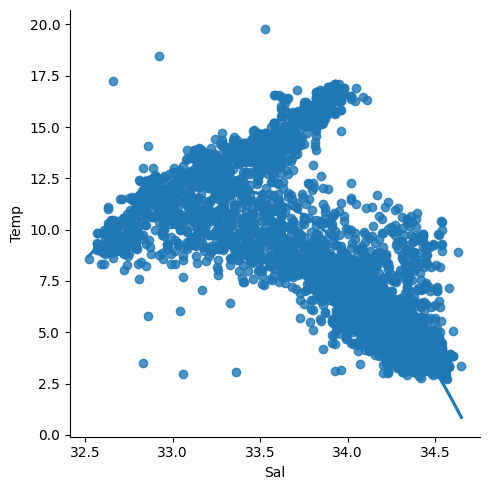

In [ ]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Sal", y ="Temp", data = df_binary, order = 2, ci = None)
plt.show()


In [ ]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)


<ipython-input-11-fe81e81b8df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)


In [ ]:
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
ypr=regr.predict(X_test)


0.4137758704998541


<ipython-input-12-6ff47c08a313>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


In [ ]:
print(ypr)

[[ 8.86750308]
 [11.06616435]
 [ 5.97999085]
 ...
 [ 8.25414264]
 [ 6.63109655]
 [ 5.92337297]]


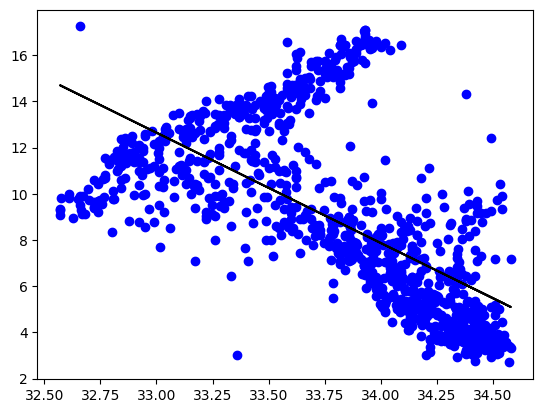

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values


#kNN

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))


[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))


0.9666666666666667


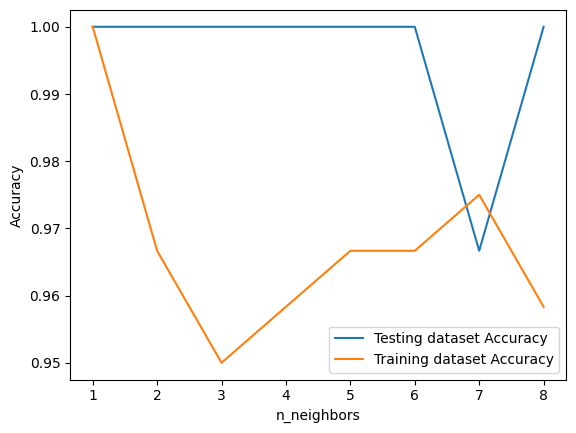

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


#KMINS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [2]:
X, y = load_iris(return_X_y=True)


In [3]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [4]:
kmeans.cluster_centers_


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [5]:
pred = kmeans.fit_predict(X)
pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

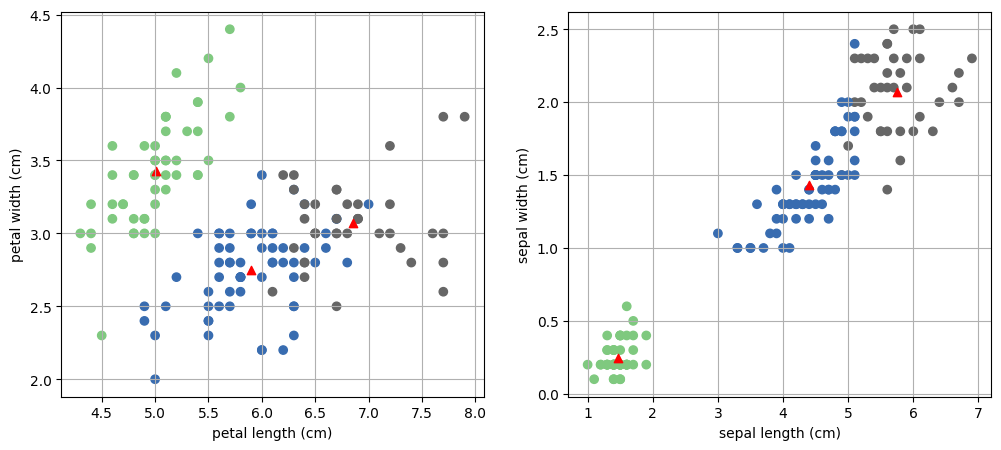

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[:2]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[2:4]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()
